# Simulated annealing (recocido simulado)

El nombre de recocido viene de la metalurgia. La idea es calentar a alta temperatura un material para luego enfriarlo lentamente con el fin eliminar posibles defectos y terminar de regreso a bajas temperaturas con una estructura cristalina ordenada.

En el recocido simulado la idea es buscar la solución óptima a un problema explorando el espacio de posibles soluciones de una forma análoga a lo que ocurre en metalurgia.

Para esta estrategia necesitamos una función costo que vamos a minimizar, como por ejemplo la energía de un sistema. Supongamos que queremos encontrar el mínimo de la función:
$$
f(x)= x^2 +20 \sin(x)
$$
por lo que nuestra función costo va a ser $f(x)$


1. Se comienza con una configuración del sistema: en nuestro ejemplo un valor de $x$.
2. Se propone un cambio en $\delta x$ en el valor de $x$: $x\to x+\delta x$.
    - Si el nuevo valor de $x$ nos da un valor menor de $f(x)$, aceptamos el cambio.
    - En caso contrario, si $f(x+\delta x)> f(x)$ aceptamos el cambio con probabilidad: $e^{-\delta f/T}$, donde $\delta f= f(x+\delta x)-f(x)$.
3. Se itera el punto 2 un número $N$ de veces, elegido buscando recorrer 'lo suficiente' el espacio de soluciones.
4. Se reduce la temperatura con algún esquema, lineal, exponencial, etc.
5. Se repiten los puntos 3 y 4 hasta que se llega a la temperatura mínima o se satisface algún otro criterio.

Hay que tener en cuenta que la temperatura controla la probabilidad de ir hacia soluciones peores (con un costo mayor), lo que sirve para explorar el espacio de soluciones y ayuda al algoritmo a evitar quedar atrapado en mínimos locales de $f(x)$. La forma en que se reduce la temperatura es muy importante porque si se enfría demasiado rápido el sistema tiene más probabilidad de quedar atrapado en un mínimo local.

El método para aceptar o rechazar cambios es el de Metrópolis, así que la distribución de valores de $x$ en nuestro ejemplo va a estar dado por la distribución de Boltzmann:
$$P(x,T)=e^{-f(x)/T}/Z,$$
donde $Z=\int_{-\infty}^{\infty} e^{-f(x)/T} dx$, para que la probabilidad esté normalizada.



## Distribución de Boltzmann
En el siguiente código se grafica a una temperatura $T$ el histograma de valores que toma $x$ para 1000 iteraciones proponiendo cambios de $x$ en el intervalo $[-1,1]$. También se muestra el resultado esperado: $P(x,T)$ y la función:
$$
f(x)= x^2 +20 \sin(x)
$$

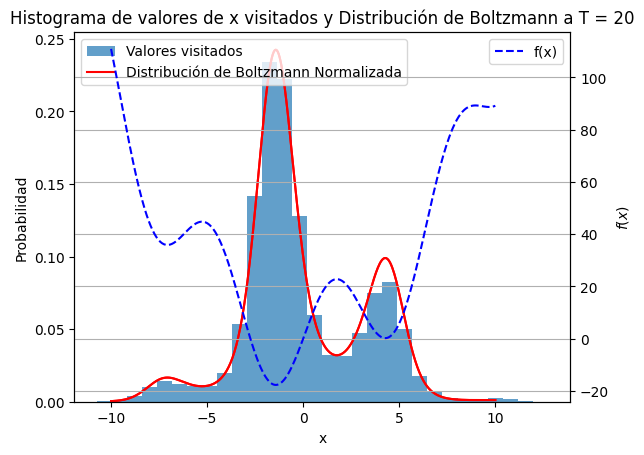

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import math

# Función a minimizar (considerada como una energía)
def funcion(x):
    return x**2 + 20*np.sin(x)

# Probabilidad sin normalizar según la distribución de Boltzmann
def probabilidad_boltzmann_sin_normalizar(x, T):
    return np.exp(-funcion(x) / T)

# Integrando para normalizar
def integrando(x, T):
    return probabilidad_boltzmann_sin_normalizar(x, T)

# Probabilidad de Boltzmann normalizada
def probabilidad_boltzmann_normalizada(x, T):
    valor_integral, _ = quad(integrando, -10, 10, args=(T))
    return probabilidad_boltzmann_sin_normalizar(x, T) / valor_integral

# Algoritmo de recocido simulado para un T fijo
def recocido_simulado_T_fijo(solucion_inicial, T, max_iteraciones, valores_x):
    solucion_actual = solucion_inicial
    valor_actual = funcion(solucion_actual)

    for i in range(max_iteraciones):
        valores_x.append(solucion_actual)

        # Perturbar la solución actual
        nueva_solucion = solucion_actual + np.random.uniform(-1, 1)
        nuevo_valor = funcion(nueva_solucion)

        # Calcular el cambio en energía
        delta_E = nuevo_valor - valor_actual

        # Si la nueva solución es mejor o una chance aleatoria lo permite, actualizar la solución actual
        if delta_E < 0 or np.random.random() < math.exp(-delta_E / T):
            solucion_actual = nueva_solucion
            valor_actual = nuevo_valor

    return solucion_actual, valor_actual

# Parámetros
solucion_inicial = np.random.uniform(-10, 10)
T = 20
max_iteraciones = 100000
valores_x = []

mejor_solucion, mejor_valor = recocido_simulado_T_fijo(solucion_inicial, T, max_iteraciones, valores_x)

fig, ax1 = plt.subplots()

# Histograma
ax1.hist(valores_x, bins=30, density=True, alpha=0.7, label='Valores visitados')

# Distribución de Boltzmann normalizada
rango_x = np.linspace(-10, 10, 400)
probabilidades_normalizadas = probabilidad_boltzmann_normalizada(rango_x, T)

ax1.plot(rango_x, probabilidades_normalizadas, color='red', label='Distribución de Boltzmann Normalizada')
ax1.set_xlabel('x')
ax1.set_ylabel('Probabilidad')
ax1.legend(loc='upper left')

plt.plot(rango_x, probabilidades_normalizadas, color='red', label='Distribución de Boltzmann $\\propto e^{-f(x)/T}$')

ax2 = ax1.twinx()  # Crear un segundo eje y que comparte el mismo eje x
ax2.plot(rango_x, funcion(rango_x), color='blue', linestyle='--', label='f(x)')
ax2.set_ylabel('$f(x)$')
ax2.legend(loc='upper right')


plt.title(f'Histograma de valores de x visitados y Distribución de Boltzmann a T = {T}')
plt.grid(True)
plt.show()


Veamos ahora los valores de $x$ visitados en las iteraciones de Monte Carlo a medida que se reduce la temperatura.

Mejor solución: x = -1.4318 con valor f(x) = -17.7571


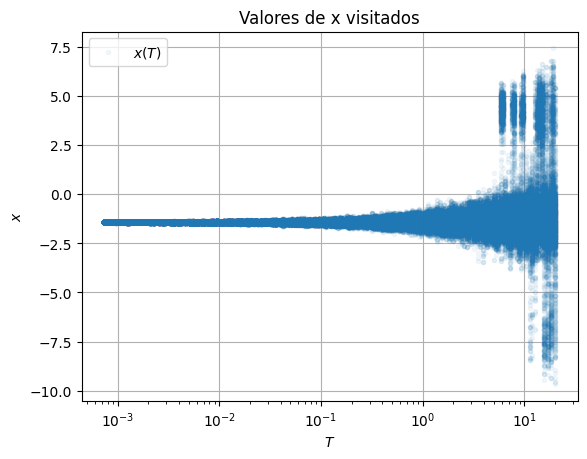

In [ ]:
import math
import random
import matplotlib.pyplot as plt

# Función a minimizar
def f(x):
    return x**2 + 20*math.sin(x)

# Algoritmo de recocido simulado
def recocido_simulado(solucion_inicial, temperatura_inicial, alfa, max_iteraciones, pasos_T):
    solucion_actual = solucion_inicial
    valor_actual = f(solucion_actual)
    T = temperatura_inicial
    Temps = []
    x_T = []
    for i in range(max_iteraciones):
        for _ in range(pasos_T):
            # Perturbar la solución actual
            nueva_solucion = solucion_actual + random.uniform(-1, 1)
            nuevo_valor = f(nueva_solucion)

            # Calcular el cambio en energía
            delta_E = nuevo_valor - valor_actual

            # Si la nueva solución es mejor o una chance aleatoria lo permite, actualizar la solución actual
            if delta_E < 0 or random.random() < math.exp(-delta_E / T):
                solucion_actual = nueva_solucion
                valor_actual = nuevo_valor

            Temps.append(T)
            x_T.append(solucion_actual)
        # Decrecer la temperatura
        T = alfa * T
        #print("T = "+ str(T) + ", x = "+ str(solucion_actual))

    return solucion_actual, valor_actual, Temps, x_T

# Parámetros
solucion_inicial = random.uniform(-10, 10)
temperatura_inicial = 20
# Factor para reducir la temperatura
alfa = 0.95
# Valores de temperatura
max_iteraciones = 200
# Intentos de cambio de x a una temperatura dada.
pasos_T = 1000

mejor_solucion, mejor_valor, Temps, X_T = recocido_simulado(solucion_inicial, temperatura_inicial, alfa, max_iteraciones, pasos_T)
print(f"Mejor solución: x = {mejor_solucion:.4f} con valor f(x) = {mejor_valor:.4f}")

fig, ax1 = plt.subplots()

ax1.plot(Temps, X_T, 'o', label='$x(T)$', alpha =0.05, markersize=3)
ax1.set_xlabel('$T$')
ax1.set_ylabel('$x$')
ax1.set_xscale('log')
#ax1.set_xlim([0.01,30])
ax1.legend(loc='upper left')
plt.title(f'Valores de x visitados')
plt.grid(True)
plt.show()